# Linear regression project

In [68]:
# Import libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt  
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures


In [25]:
# Read dataset
url = 'https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv'
df = pd.read_csv(url)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
'''
DICTIONARY
age: age of primary beneficiary
sex: insurance contractor gender, female or male
bmi: Body mass index
children: Number of children covered by health insurance / Number of dependents
smoker: Smoking
region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
charges: Individual medical costs billed by health insurance
'''

In [7]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [10]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

<AxesSubplot:>

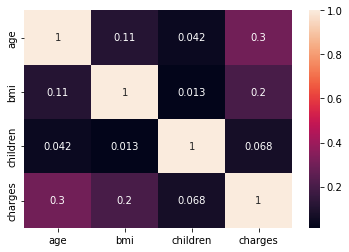

In [12]:
sns.heatmap(df.corr(), annot=True)

# para detectar posibles importantes regresores, correlación importante con nuestra variable de interés
# para detecatar tmb colinealidad entre regresores

In [13]:
df.describe(include='object')

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [18]:
# To see if there are duplicates we will check the id column

duplicates = df.duplicated().sum()

print(f'It seems that there are {duplicates} duplicated rows in the dataset.')

It seems that there are 1 duplicated rows in the dataset.


Vemos que hay una fila duplicada, pero no tenemos certeza de que corresponda a la misma persona, entonces no es tan seguro que haya que borrarla. Como es solo una la dejamos.

In [29]:
df = pd.get_dummies(df, drop_first=True)

df.head()

# sexo femenino, no fumador y region noreste son nuestra referencia que son las categorías que no estamos incluyendo

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


In [30]:
X = df.drop('charges', axis=1)
y = df['charges']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=15)

In [44]:
# Entrenamos el modelo
model = LinearRegression()

# fit linear regression
model.fit(X_train, y_train)

print('Intercept:',model.intercept_)
print('Variables:', X_train.columns)
print('Slope:', model.coef_)

Intercept: -11812.952212787559
Variables: Index(['age', 'bmi', 'children', 'sex_male', 'smoker_yes', 'region_northwest',
       'region_southeast', 'region_southwest'],
      dtype='object')
Slope: [  259.28377294   334.33013348   560.38480047  -216.92164981
 24043.57115706  -210.36710762 -1159.01410243  -989.16702841]


In [46]:
# otra implementación de la regresión lineal
# con statsmodels
X_int = sm.add_constant(X_train) 

modelo2 = sm.OLS(y_train, X_int)

results = modelo2.fit()

results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                     351.2
Date:                Mon, 04 Jul 2022   Prob (F-statistic):          1.85e-283
Time:                        23:27:33   Log-Likelihood:                -10183.
No. Observations:                1003   AIC:                         2.038e+04
Df Residuals:                     994   BIC:                         2.043e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1.181e+04   1164.810    -10.142      0.000   -1.41e+04   -9527.184
age                259.2838     14.094     18.396      0.000     231.626     286.942
bmi                334.3301     33.696      9.922      0.000     268.206     400.454
children           560.3848    161.831      3.463      0.001     242.816     877.954
sex_male          -216.9216    397.204     -0.546      0.585    -996.376     562.532
smoker_yes        2.404e+04    499.031     48.181      0.000    2.31e+04     2.5e+04
region_northwest  -210.3671    567.856     -0.370      0.711   -1324.700     903.966
region_southeast -1159.0141    572.395     -2.025      0.043   -2282.255     -35.773
region_southwest  -989.1670    558.264     -1.772      0.077   -2084.678     106.343
==============================================================================
Omnibus:                      231.741   Durbin-Watson:                   2.155
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              545.491
Skew:                           1.239   Prob(JB):                    3.53e-119
Kurtosis:                       5.629   Cond. No.                         310.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
# hacemos las predicciones para la base de prueba

y_pred = model.predict(X_test)

array([ 3.39089001e+04,  2.56293864e+04,  3.66042796e+03,  3.21835656e+03,
        2.91330950e+03,  8.03967100e+03,  1.19442666e+03,  3.52046957e+04,
        8.50575582e+03,  8.65746322e+03,  4.01520702e+03,  6.00104516e+03,
        3.64508965e+04,  3.30471437e+04,  5.59629587e+03,  3.75667439e+04,
        2.73298852e+04,  9.61073179e+03,  3.00733138e+04,  8.39334767e+03,
        5.62445286e+03,  9.52396196e+03,  3.49965866e+03,  1.82518072e+04,
        1.19922469e+04,  8.50401916e+03,  7.76180319e+03,  3.89656622e+04,
        3.65169591e+03, -1.64816539e+02,  6.65145599e+03,  9.21045658e+03,
        5.58431458e+03,  4.09264560e+04,  7.34748711e+03,  5.67568989e+03,
        5.81222611e+03,  4.05492685e+03,  6.42601274e+03,  1.15835525e+04,
        7.23109984e+03,  1.06950920e+04,  1.55605000e+04,  2.88674101e+03,
        1.10881133e+04,  1.10344017e+04,  1.18853518e+04,  6.51015502e+03,
        9.43956539e+03,  2.86418531e+04,  1.68965010e+03,  2.47662333e+03,
        9.09916582e+03,  

In [55]:
# Metricas de evaluacion

print('MAE', metrics.mean_absolute_error(y_test, y_pred))
print('MSE', metrics.mean_squared_error(y_test, y_pred))
print('RMSE', metrics.mean_squared_error(y_test, y_pred,squared=False))

MAE 4023.6471495940405
MSE 30723136.826880053
RMSE 5542.845553222645


### hipertuning

Modelo sin constante

In [63]:
# Entrenamos el modelo
model3 = LinearRegression(fit_intercept=False)

# fit linear regression
model3.fit(X_train, y_train)



LinearRegression(fit_intercept=False)

In [66]:
# hacemos las predicciones para la base de prueba

y_pred3 = model3.predict(X_test)

In [67]:
# Metricas de evaluacion

print('MAE', metrics.mean_absolute_error(y_test, y_pred3))
print('MSE', metrics.mean_squared_error(y_test, y_pred3))
print('RMSE', metrics.mean_squared_error(y_test, y_pred3,squared=False))

MAE 4278.042622074816
MSE 34870064.92980866
RMSE 5905.088054365376


Las metricas son peores que en el caso del modelo con constante.

### Modelo con polinomio de segundo grado e interacciones

In [69]:


# Probamos con polinomio

poly_features = PolynomialFeatures(degree=2) # la vamos a usar para generar todos los x al cuadrado y las de interaccion
# si no queremos las de interacción deberíamos poner 

X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.fit_transform(X_test)

model4 = model.fit(X_train_poly, y_train) #model era la regresion lineal que ya habiamos hecho

In [70]:
y_pred4 = model4.predict(X_test_poly)

In [71]:
# Metricas de evaluacion

print('MAE', metrics.mean_absolute_error(y_test, y_pred4))
print('MSE', metrics.mean_squared_error(y_test, y_pred4))
print('RMSE', metrics.mean_squared_error(y_test, y_pred4,squared=False))

MAE 3794.6198658238804
MSE 27793221.25291654
RMSE 5271.927660061027
